# Exploratory Data Analysis and Visualization

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# !pip install ipynb

---

## 1. Exploring `anime.csv` dataset [2000 to 2021 animes]




In [3]:
anime_df = pd.read_csv('dataset/anime_cleaned.csv')
anime_df.head()

,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,...,start_season_year,start_season_season,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users
0,95,Turn A Gundam,1999-04-09,2000-04-14,"It is the Correct Century, two millennia after...",7.71,1049,2892,40743,13338,...,1999.0,spring,friday,17:00,2735.0,16661.0,2538.0,1597.0,17292.0,40823.0
1,3665,Ginga Eiyuu Densetsu Gaiden (1999),1999-12-24,2000-07-21,Ginga Eiyuu Densetsu Gaiden (1999) is the seco...,8.07,472,4347,17849,6478,...,1999.0,fall,NIL,NIL,814.0,8080.0,638.0,293.0,8048.0,17873.0
2,2471,Doraemon (1979),1979-04-02,2005-03-18,Nobita Nobi is a normal fourth grade student. ...,7.74,976,2553,51255,23826,...,1979.0,spring,NIL,NIL,4637.0,29125.0,4569.0,7816.0,5227.0,51374.0
3,21,One Piece,1999-10-20,airing,"Gol D. Roger was known as the ""Pirate King,"" t...",8.63,66,26,1812581,1020274,...,1999.0,fall,sunday,09:30,1227452.0,0.0,234652.0,161273.0,189153.0,1812530.0
4,2397,Digimon Adventure: Bokura no War Game!,2000-03-04,2000-03-04,This movie takes place after the Adventure ser...,7.77,924,2135,70125,43599,...,2000.0,winter,NIL,NIL,653.0,63538.0,285.0,314.0,5432.0,70222.0


### Features available to explore:

In [4]:
print("Features:")
print("---------")

for header in anime_df.columns:
    print(header)

Features:
---------
id
title
start_date
end_date
synopsis
mean
rank
popularity
num_list_users
num_scoring_users
nsfw
media_type
status
genres
num_episodes
source
average_episode_duration
rating
studios
start_season_year
start_season_season
broadcast_day_of_the_week
broadcast_start_time
statistics_watching
statistics_completed
statistics_on_hold
statistics_dropped
statistics_plan_to_watch
statistics_num_list_users


### Convert `studios` and `genres` features to json for exploration:

In [11]:
from ipynb.fs.full.data_cleaning_preprocessing import json_studios, json_genres;
print("json_studios(), json_genres() imported from data_cleaning_preprocessing.ipynb")

json_studios(), json_genres() imported from data_cleaning_preprocessing.ipynb


In [6]:
# convert to json
anime_df = json_studios(anime_df)
anime_df = json_genres(anime_df)

### Explore `genres` feature

In [14]:
from collections import defaultdict

In [48]:
genres_dict = defaultdict(int)

# getting the genres count from 2000 to 2021
for anime in anime_df['genres']:
    for genre in anime:
        genres_dict[genre['name']] += 1
               
# printing out the genre counts
for genre, count in genres_dict.items():
    print(f'{genre}: {count}')

Action: 2744
Adventure: 2278
Drama: 1620
Mecha: 623
Military: 381
Romance: 1125
Sci-Fi: 1458
Space: 230
Comedy: 4571
Fantasy: 2311
Kids: 1253
Shounen: 2036
Super Power: 606
Police: 236
Slice of Life: 1377
School: 1197
Shoujo: 637
Ecchi: 334
Seinen: 626
Mystery: 642
Demons: 351
Horror: 191
Supernatural: 1075
Psychological: 255
Parody: 339
Cars: 69
Historical: 583
Martial Arts: 295
Samurai: 128
Avant Garde: 74
Vampire: 93
Suspense: 118
Music: 821
Game: 377
Harem: 157
Gourmet: 100
Sports: 465
Boys Love: 41
Girls Love: 39
Award Winning: 3
no_genre: 8
Josei: 70


### Plot genre counts

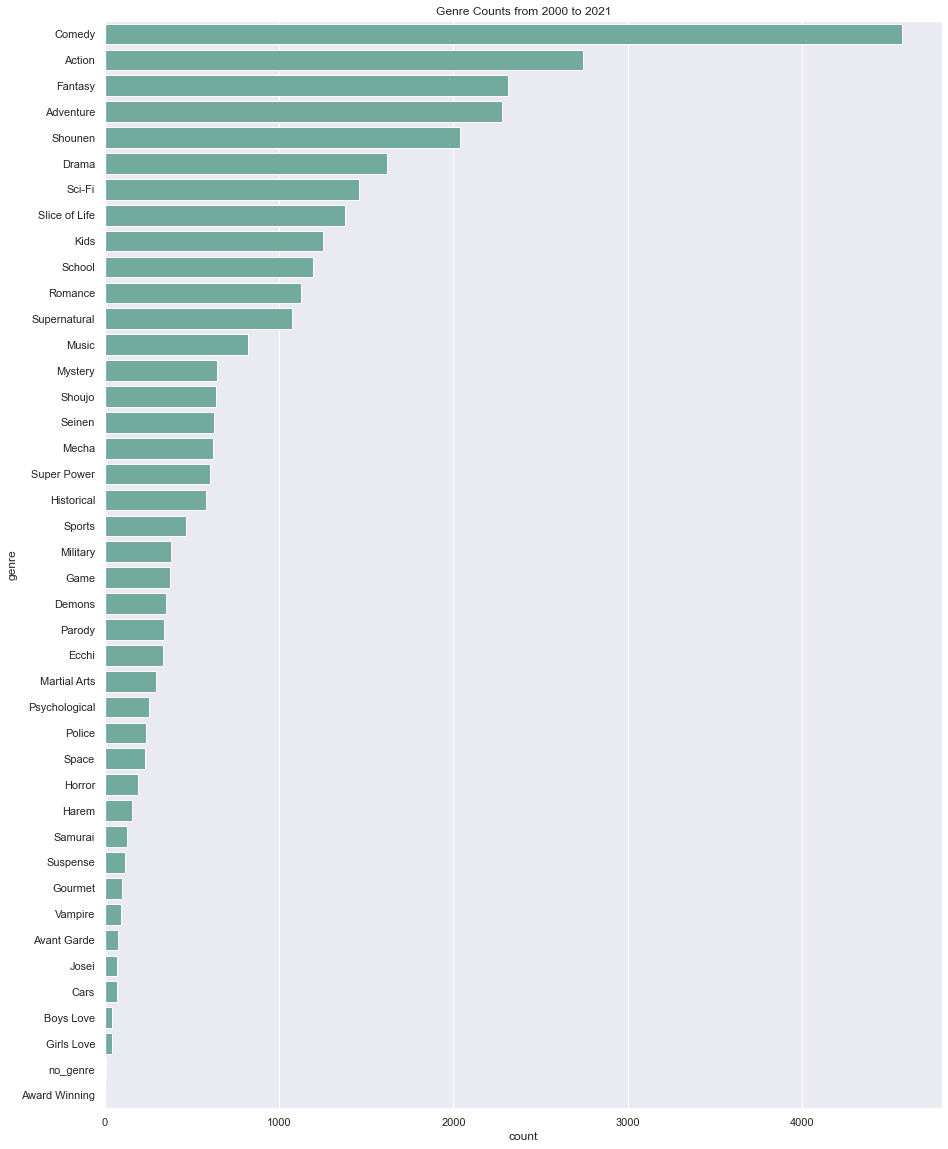

In [90]:
# Plot Genre Counts

# convert dict to dataframe
genre_df = pd.DataFrame(genres_dict.items())

# rename column names
genre_df.rename(columns={0: 'genre', 1: 'count'}, inplace=True)

# Reorder genre dataframe in descending order
genre_df = genre_df.sort_values(['count'], ascending=False).reset_index(drop=True)


# Set the figure size
plt.figure(figsize=(15, 20))

# Make a barplot
sb.barplot(
    x="count", 
    y="genre", 
    data=genre_df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
).set(title="Genre Counts from 2000 to 2021");

- It can be seen that `Comedy` is the genres that most anime have
- The top 5 genres commonly seen  are `Comedy`,  `Action`, `Fantasy`, `Adventure`, and `Shounen`

**Analysis:**
- It seems that animes are generally produced to produce some sort of commedic effect, with a sense of fantasy and adventure filled with action packed scenes.
- Thus, it appears that animes are shows that allow people to have a fun time escaping into another world